In [1]:
state = 'ID' 
year = 2020
obj_type = 'bottleneck_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 154 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 12 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 910358 and U = 928748 and k = 2.

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 6, 11, 12, 13, 21, 24, 35], [0, 2, 3, 4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]]
Objective value: 0.22883198997372206
Deviation: 237.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 720

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1320 rows, 1059 columns and 4425 nonzeros
Model fingerprint: 0x633e3bf5
Model has 2 quadratic constraints
Variable types: 271 continuous, 788 integer (788 binary)
Coefficient statistics:
  Matrix range     [2e-02, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objecti

Presolved model has 2 quadratic constraint(s)
Variable types: 7 continuous, 530 integer (530 binary)

Root relaxation: objective 6.394028e-04, 91 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00064    0    4    6.42387    0.00064   100%     -    0s
     0     0    2.49824    0   55    6.42387    2.49824  61.1%     -    0s
     0     0    2.56237    0   52    6.42387    2.56237  60.1%     -    0s
     0     0    2.56678    0   52    6.42387    2.56678  60.0%     -    0s
     0     0    2.57208    0   52    6.42387    2.57208  60.0%     -    0s
     0     0    2.57246    0   52    6.42387    2.57246  60.0%     -    0s
     0     2    2.59383    0   52    6.42387    2.59383  59.6%     -    0s
 13188   850 infeasible   32         6.42387    5.55520  13.5%  23.3    5s

Cutting planes:
  Gomory: 1
  Lazy constraints: 28

Explor

  7362  2443    4.72927   27  122    7.76482    4.60624  40.7%  26.1    5s
 23665  5534 infeasible   38         7.76482    5.18270  33.3%  25.6   10s
 38371  7538 infeasible   36         7.76482    5.49925  29.2%  24.9   15s
 52086  8793    6.28574   34   25    7.76482    5.71811  26.4%  24.8   20s
 63934  9351     cutoff   32         7.76482    5.71811  26.4%  24.7   25s
 74824  9695    6.74397   33   13    7.76482    5.71811  26.4%  24.5   30s
 86966  9513          -   28         7.76482    5.71811  26.4%  24.6   35s
 97478  9111    7.17086   25  119    7.76482    5.71811  26.4%  24.6   40s
 108359  8063 infeasible   32         7.76482    5.71811  26.4%  24.5   46s
 117471  6646 infeasible   27         7.76482    5.71811  26.4%  24.3   50s
 125580  4714    7.20745   31   13    7.76482    5.71811  26.4%  24.0   55s
 136024   515 infeasible   34         7.76482    5.71811  26.4%  23.6   60s

Cutting planes:
  Gomory: 6
  Cover: 487
  MIR: 140
  StrongCG: 148
  Flow cover: 14
  Inf proo

 245079 13307    7.67536   31   38    8.35801    6.25312  25.2%  26.8  250s
 249862 12666     cutoff   30         8.35801    6.25312  25.2%  26.7  256s
 254023 11976    7.87429   23   65    8.35801    6.25312  25.2%  26.6  262s
 256323 11639 infeasible   26         8.35801    6.25312  25.2%  26.6  265s
 260629 10764 infeasible   24         8.35801    6.25312  25.2%  26.5  272s
 262862 10304 infeasible   28         8.35801    6.25312  25.2%  26.5  275s
 266910  9343     cutoff   24         8.35801    6.25312  25.2%  26.5  281s
 271650  8875 infeasible   29         8.35801    6.25312  25.2%  26.4  285s
 274139  7700 infeasible   30         8.35801    6.25312  25.2%  26.3  291s
 277144  7047    7.64249   30   50    8.35801    6.25312  25.2%  26.3  295s
 280738  5538 infeasible   31         8.35801    6.25312  25.2%  26.2  301s
 285157  3477 infeasible   27         8.35801    6.25312  25.2%  26.1  307s
 289670   830 infeasible   27         8.35801    6.25312  25.2%  25.9  311s
 292815  179

 267712 35310 infeasible   28        10.89635    7.41030  32.0%  25.2  230s
 272884 35593    7.91078   30    7   10.89635    7.43715  31.7%  25.1  237s
 274787 35656    8.76361   27   58   10.89635    7.44855  31.6%  25.1  240s
 278153 35785 infeasible   31        10.89635    7.46976  31.4%  25.1  245s
 283246 35977    7.84618   29   29   10.89635    7.49945  31.2%  25.0  252s
 286861 36104 infeasible   32        10.89635    7.51818  31.0%  25.0  257s
 290244 36228 infeasible   37        10.89635    7.53569  30.8%  25.0  262s
 293852 36282 infeasible   30        10.89635    7.55570  30.7%  24.9  266s
 295379 36358 infeasible   33        10.89635    7.56304  30.6%  24.9  270s
 299772 36533 infeasible   33        10.89635    7.58608  30.4%  24.9  276s
 303155 36675    8.12434   26   40   10.89635    7.60292  30.2%  24.9  280s
 306802 36775    8.33807   29  125   10.89635    7.62212  30.0%  24.8  285s
 310223 36950   10.02365   30   52   10.89635    7.63710  29.9%  24.8  291s
 313936 3706

 633113 28668 infeasible   35        10.89635    7.77759  28.6%  22.5  770s
 637686 28309    9.34922   30   10   10.89635    7.77759  28.6%  22.5  777s
 639542 28074    9.30310   27   34   10.89635    7.77759  28.6%  22.5  780s
 643982 27670    9.87004   30   16   10.89635    7.77759  28.6%  22.5  787s
 646053 27484 infeasible   35        10.89635    7.77759  28.6%  22.5  790s
 650059 27086 infeasible   31        10.89635    7.77759  28.6%  22.4  797s
 652343 26885 infeasible   32        10.89635    7.77759  28.6%  22.4  800s
 656513 26384 infeasible   33        10.89635    7.77759  28.6%  22.4  806s
 658324 26105   10.07563   32   51   10.89635    7.77759  28.6%  22.4  810s
 662679 25485 infeasible   35        10.89635    7.77759  28.6%  22.4  816s
 666514 24875    9.37476   30   59   10.89635    7.77759  28.6%  22.3  823s
 668811 24569 infeasible   35        10.89635    7.77759  28.6%  22.3  826s
 673240 23945    9.97168   26   20   10.89635    7.77759  28.6%  22.3  833s
 674978 2355

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")


####################################################################################################
Pareto Frontier for state ID,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 5, 8, 11, 16, 18, 22, 25, 26, 27, 30, 32, 33, 35], [0, 4, 6, 7, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 23, 24, 28, 29, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[1, 2, 11, 12, 15, 21, 24, 33, 34], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 3, 11, 12, 15

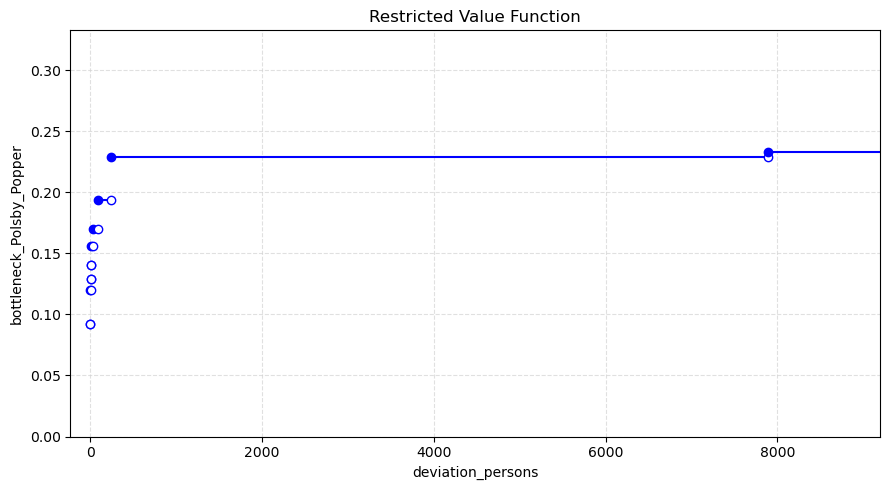

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             ) 


####################################################################################################
Pareto maps for state ID, objective bottleneck_Polsby_Popper
####################################################################################################



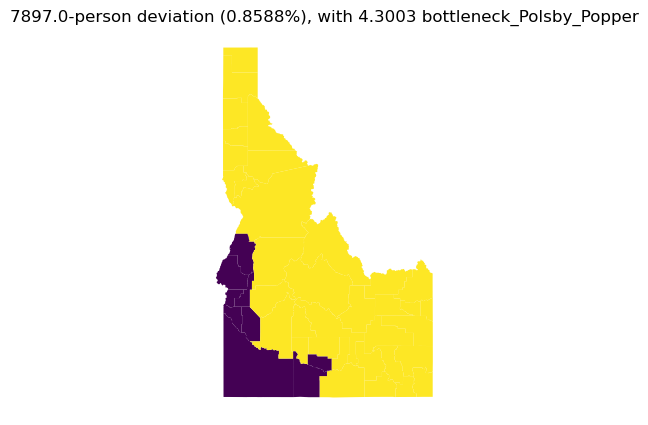

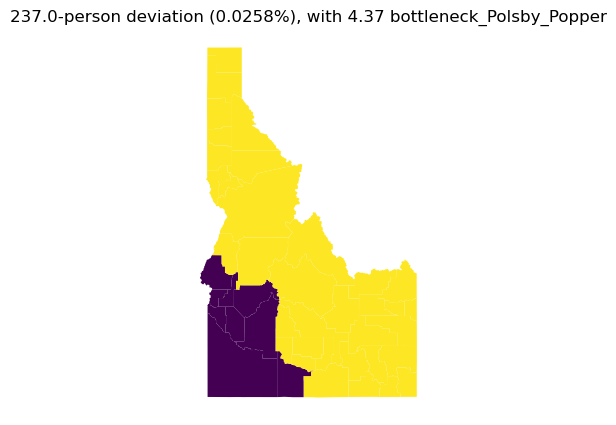

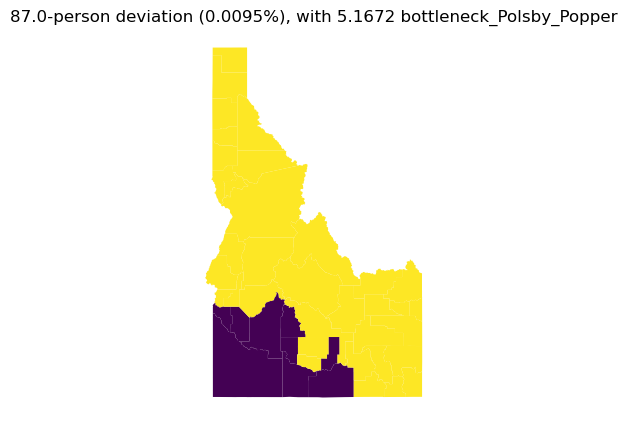

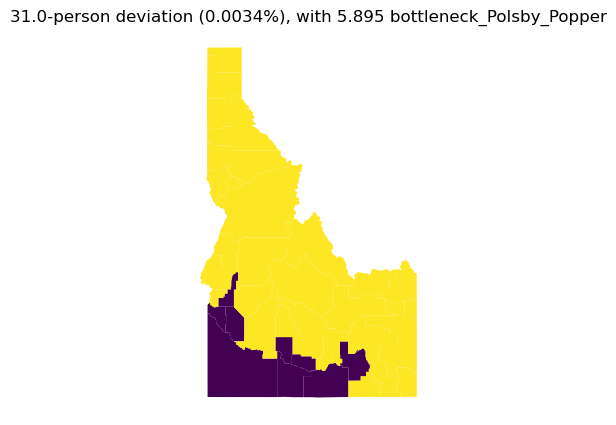

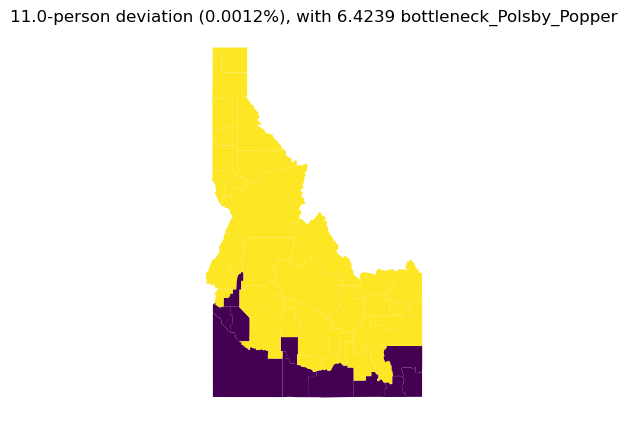

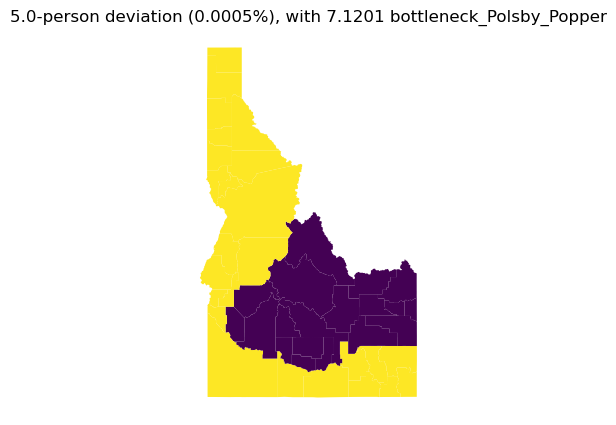

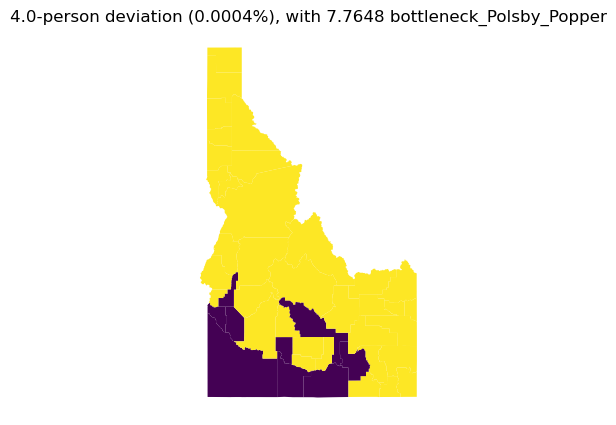

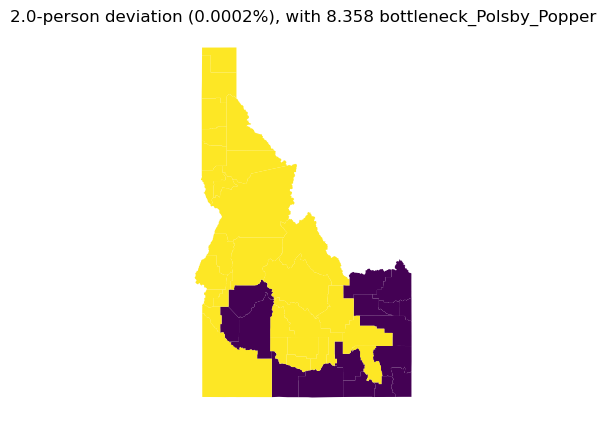

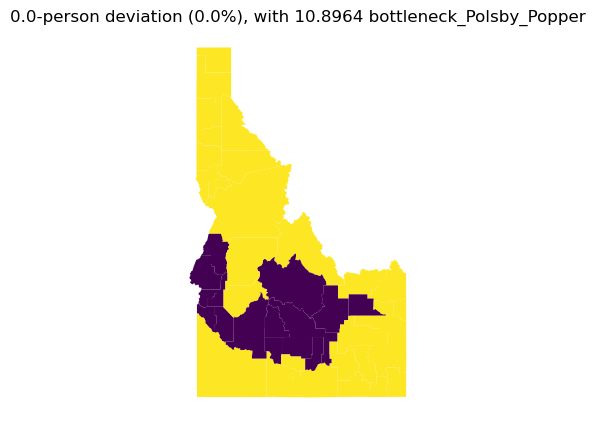

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)